# Sampling distributions

### We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor's office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/ames.csv'
url_content = requests.get(df_url, verify=False).content
ames = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
ames.head()

Order        PID  MS.SubClass MS.Zoning  Lot.Frontage  Lot.Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot.Shape Land.Contour  ... Pool.Area Pool.QC  Fence Misc.Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc.Val Mo.Sold Yr.Sold Sale.Type  Sale.Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

###  For this lab, we'll restrict our attention to just two of the variables: the above ground living area of the house in square feet (Gr.Liv.Area) and the sale price (SalePrice).

In [3]:
area = ames['Gr.Liv.Area']
price = ames['SalePrice']

In [4]:
area.describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

### Histogram of areas

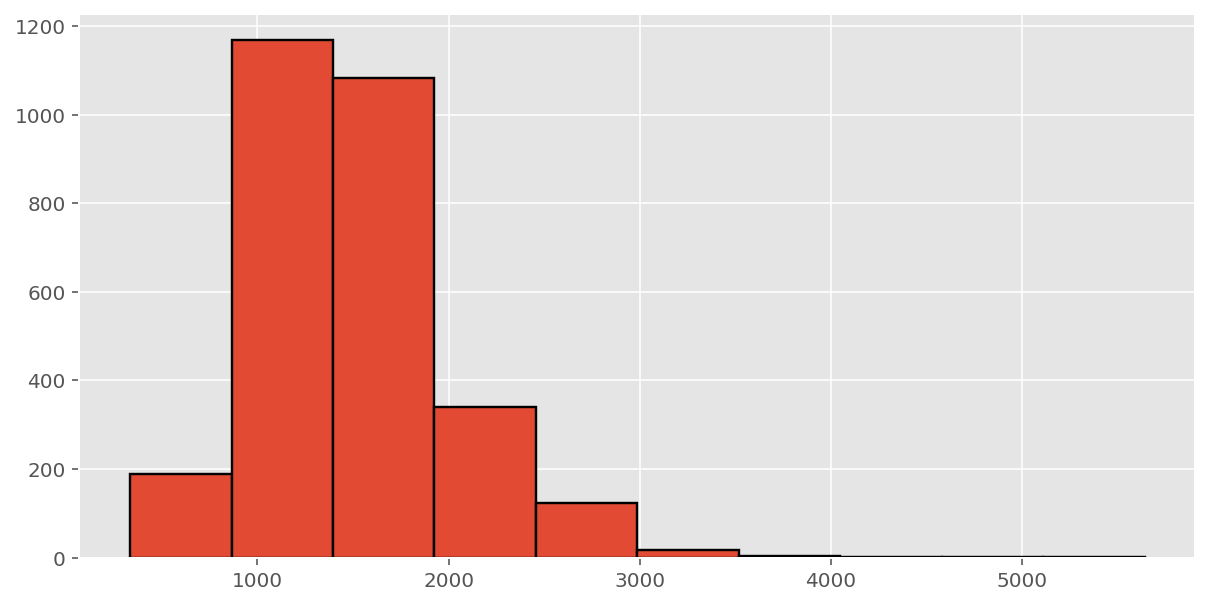

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.hist(area, edgecolor = 'black', linewidth = 1.2)
plt.show();

## Exercise 1: Test the distribution of areas by making a Q-Q plot

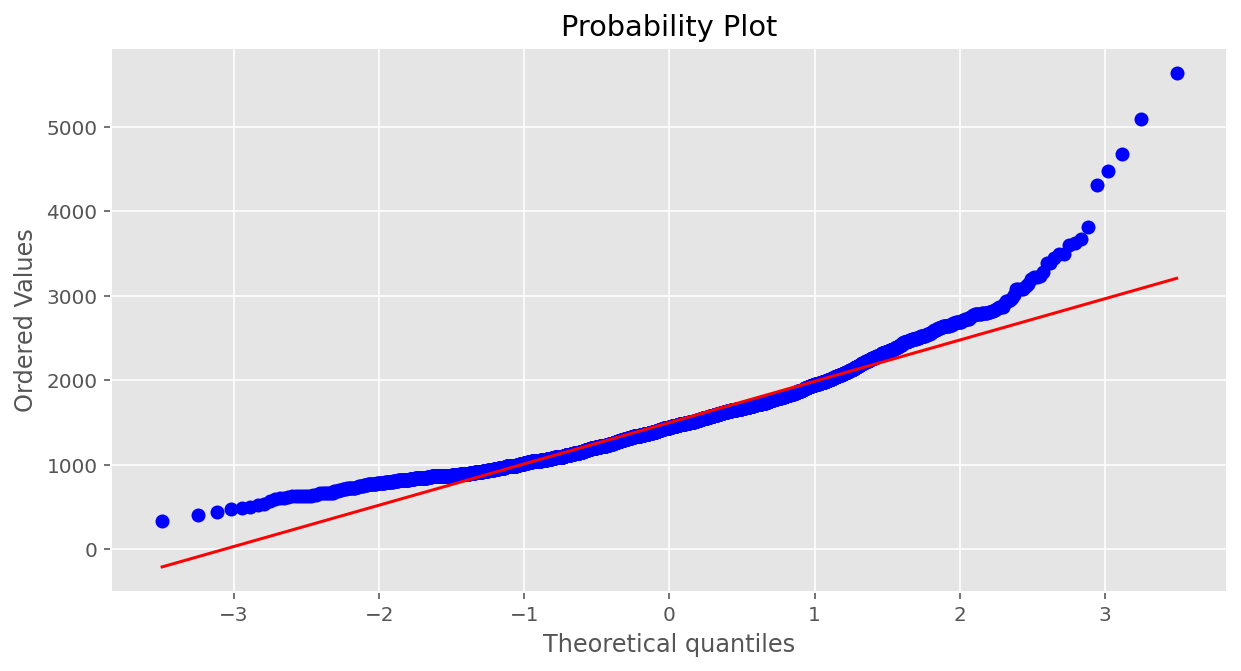

In [6]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(area, plot = plt)
plt.show();

## The unknown sampling distribution

In [8]:
sampl1 = area.sample(50) #we collect a simple random sample (size 50) from the vector area.

## Exercise 2: Make a Q-Q plot for the random sample.

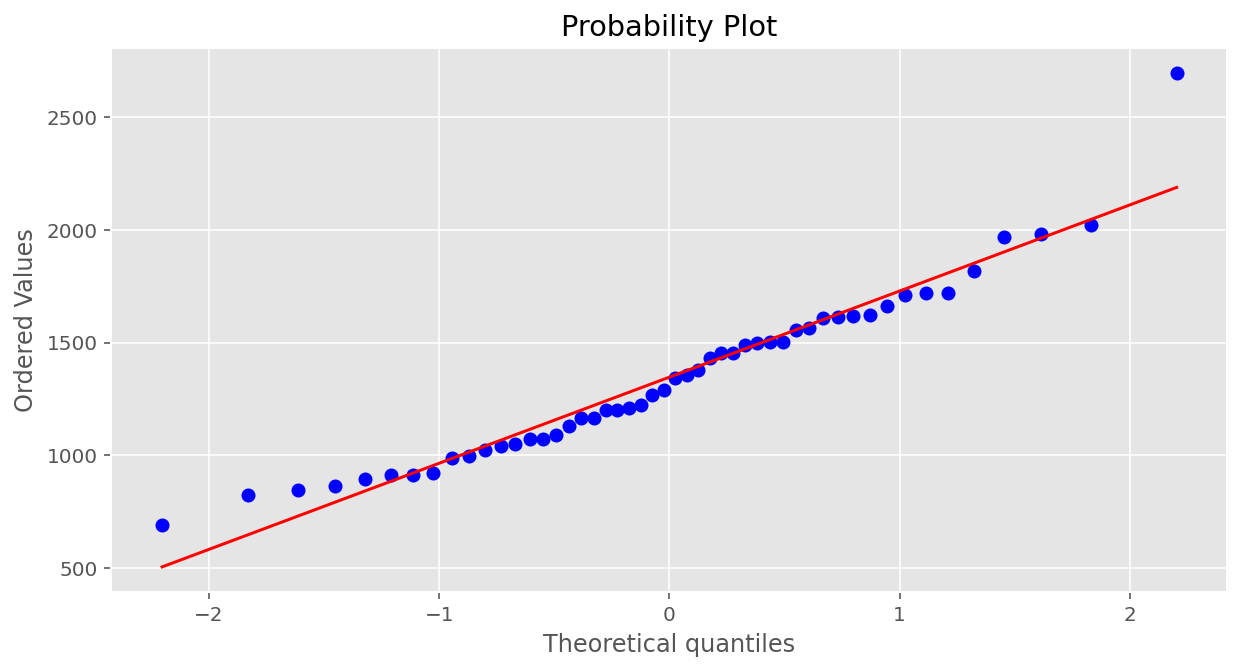

In [9]:
probplot(sampl1, plot = plt)
plt.show();

In [12]:
sampl1.mean()

1346.9

## Exercise 3: Take two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

In [13]:
sampl2 = area.sample(100)
sampl3 = area.sample(1000)

In [15]:
print(sampl2.mean())
print(sampl3.mean())

1601.83
1513.945


### Not surprisingly, every time we take another random sample, we get a different sample mean. It's useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the sampling distribution, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

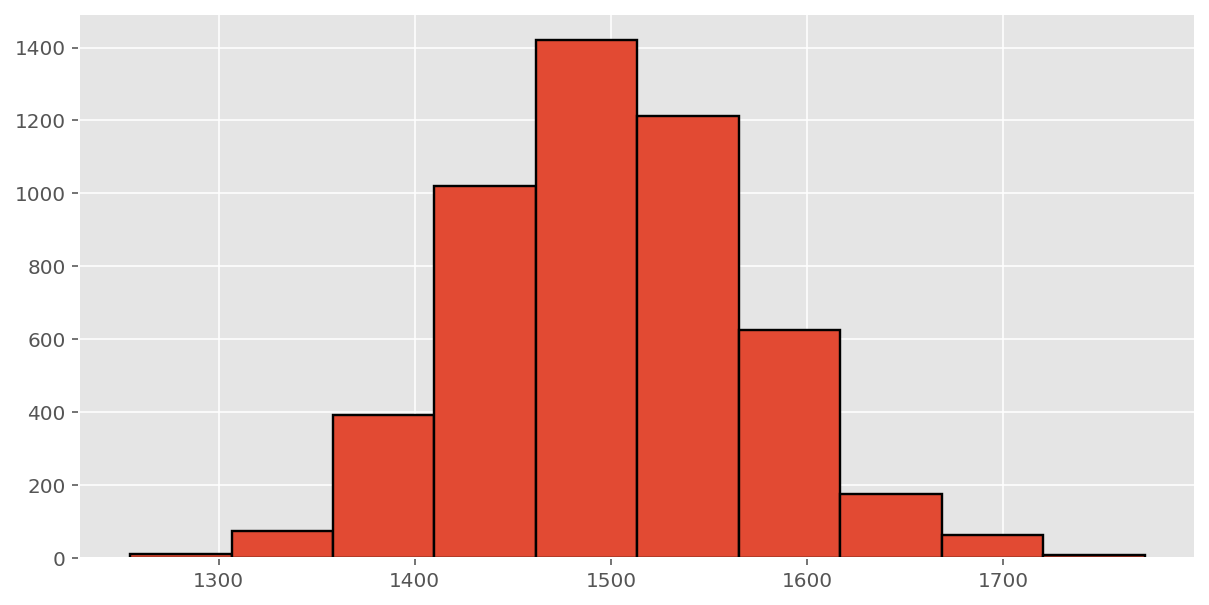

In [16]:
sample_means50 = [area.sample(50).mean() for i in range(0, 5000)]

plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2)
plt.show();

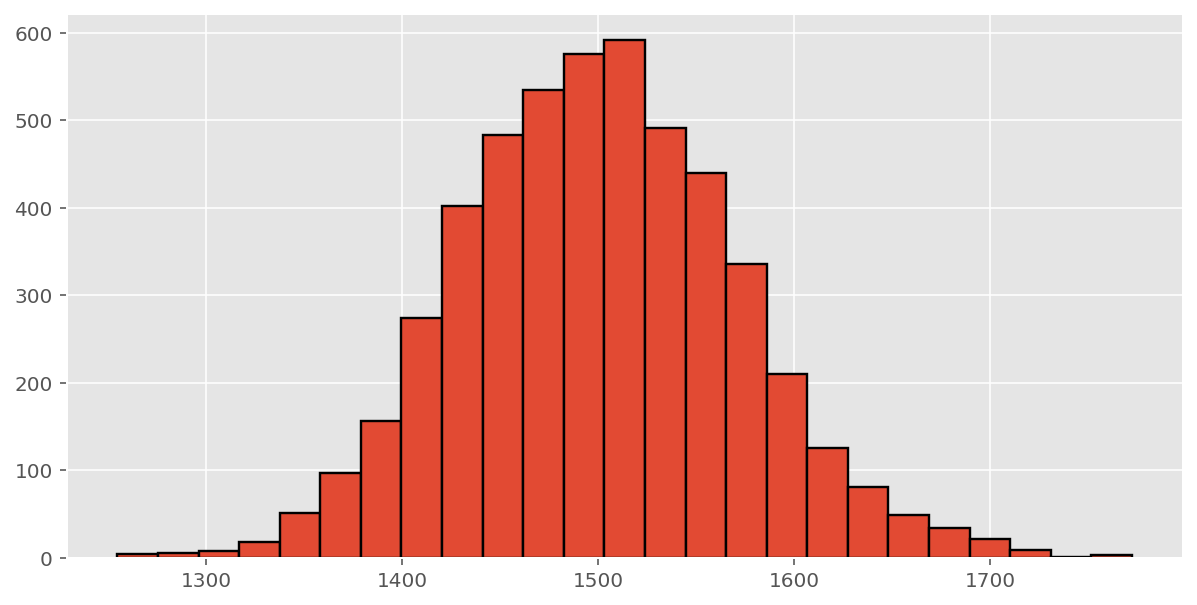

In [18]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2, bins = 25)
plt.show();

## Exercise 4: Make a Q-Q plot for sample_means50

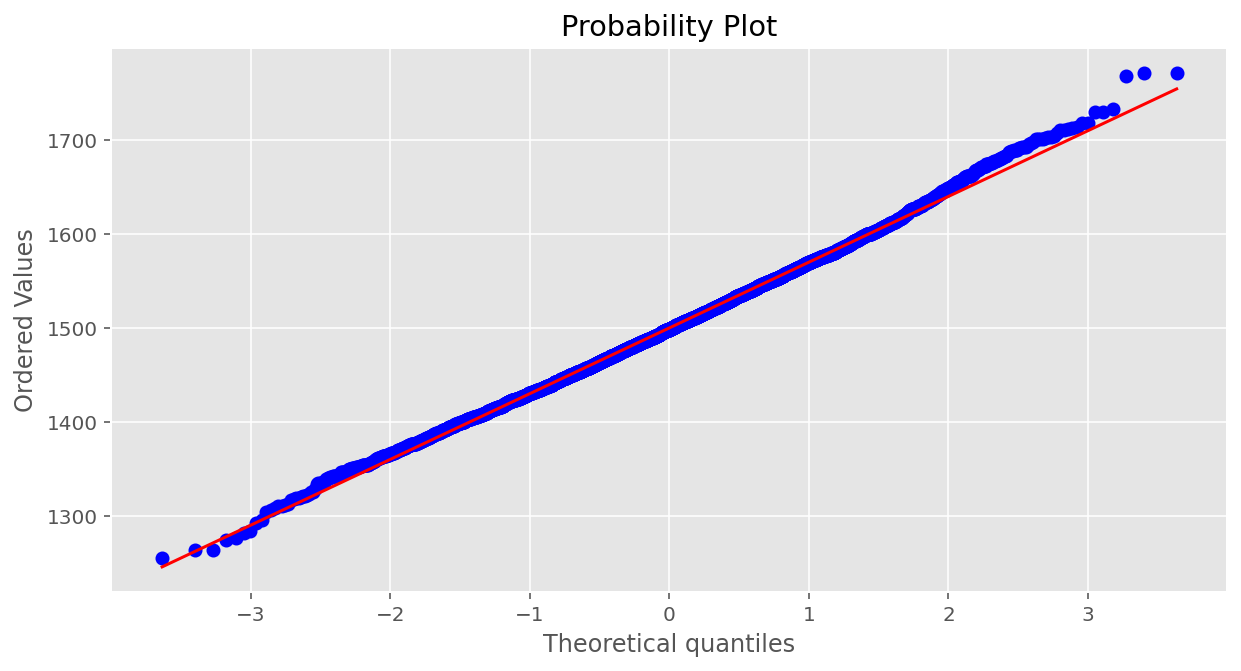

In [19]:
probplot(sample_means50, plot = plt)
plt.show();

## Sample size and the sampling distribution

### The sampling distribution that we computed tells us much about estimating the average living area in homes in Ames. Because the sample mean is an unbiased estimator, the sampling distribution is centered at the true average living area of the the population, and the spread of the distribution indicates how much variability is induced by sampling only 50 home sales.

### To get a sense of the effect that sample size has on our distribution, let's build up two more sampling distributions: one based on a sample size of 10 and another based on a sample size of 100.

In [27]:
sample_means10 = [area.sample(10).mean() for i in range(0, 5000)]
sample_means100 = [area.sample(100).mean() for i in range(0, 5000)]

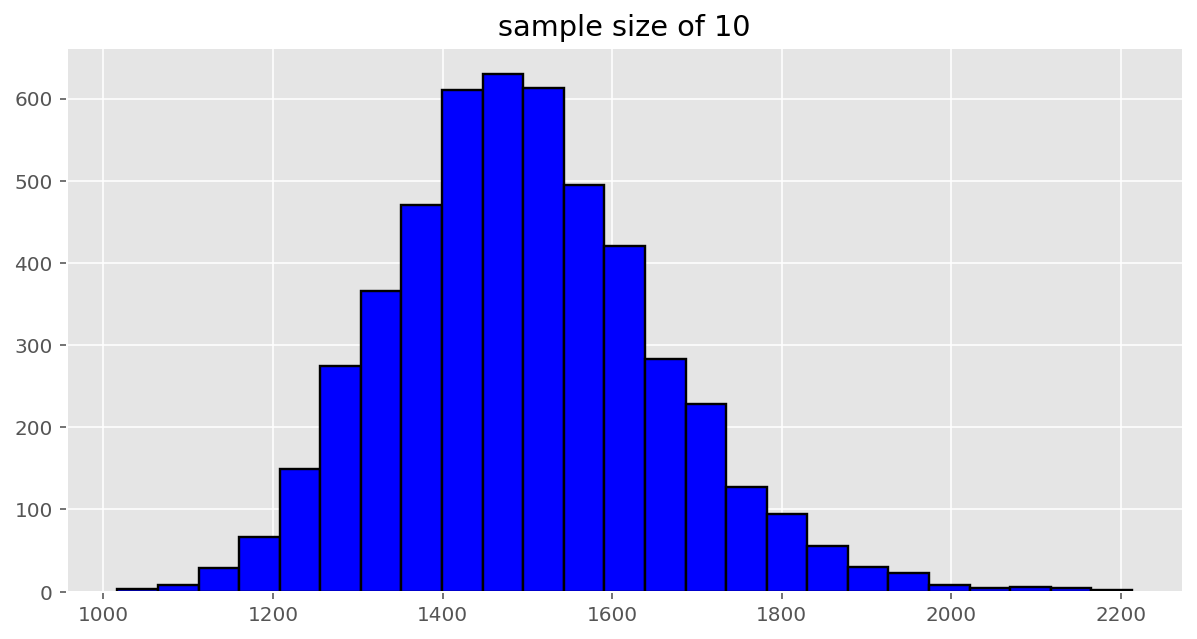

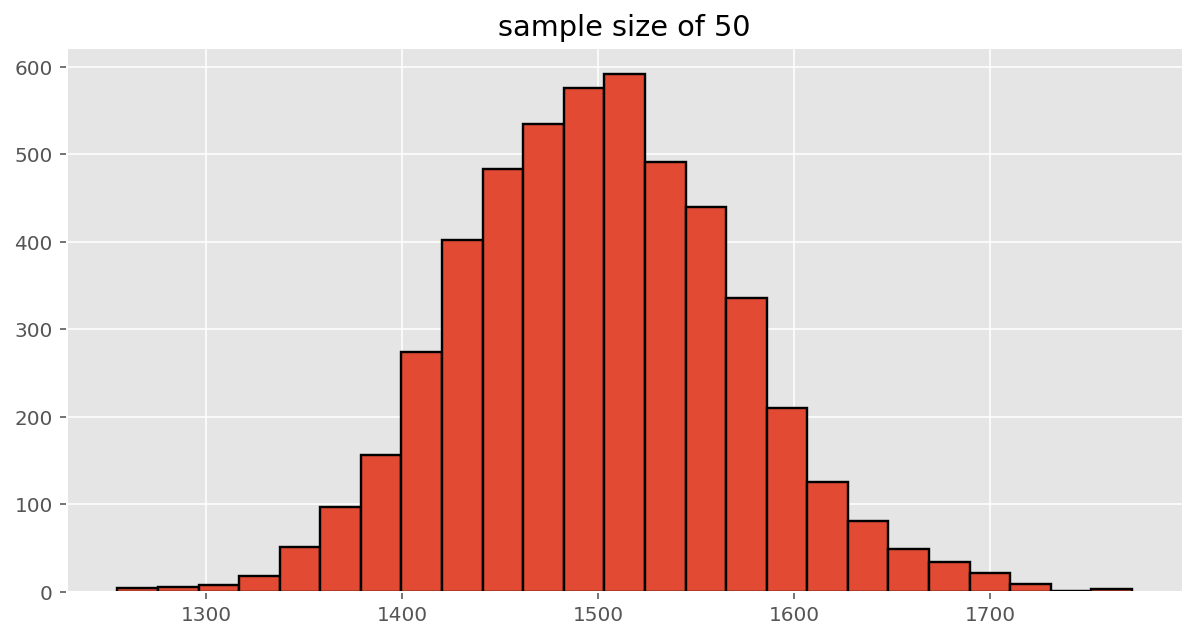

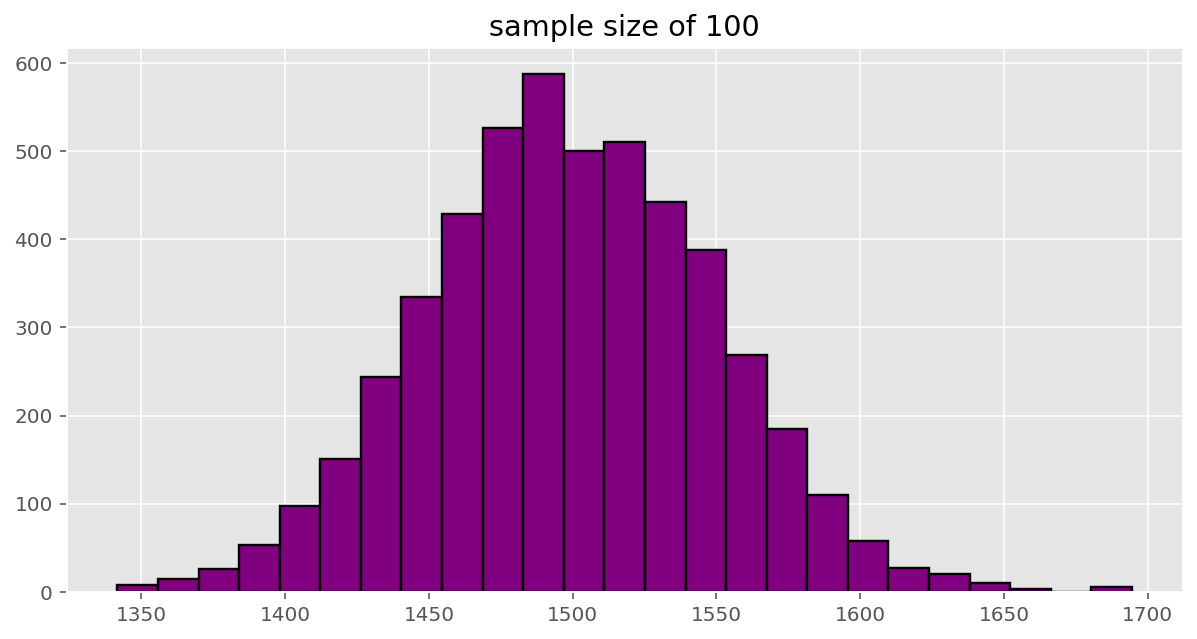

In [28]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means10, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'blue')
plt.title("sample size of 10")
plt.show();
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2, bins = 25)
plt.title("sample size of 50")
plt.show();
plt.hist(sample_means100, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'purple')
plt.title("sample size of 100")
plt.show();

## Exercise 5: When the sample size is larger, what happens to the center? What about the spread?

In [33]:
print(np.mean(sample_means10))
print(np.mean(sample_means50))
print(np.mean(sample_means100))

1496.43408
1500.330984
1499.133736


In [34]:
print(np.std(sample_means10))
print(np.std(sample_means50))
print(np.std(sample_means100))

158.22312208572296
70.03213773455543
49.62293339134945


## Exercise 6: Make the same proccess for prices